In [35]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

#Read files:
train= pd.read_csv(r'C:\Users\mfatemeh\Desktop\project\Retail_Store_Train_Forecast_Class.csv')
test= pd.read_csv(r'C:\Users\mfatemeh\Desktop\project\Retail_Store_Test_Forecast_Class.csv')

In [9]:
train['source'] = 'train'
test['source'] = 'test'
data =pd.concat([train, test])
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [11]:
data.head(10)
data.tail(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
5671,reg,FDA01,59.5904,NaN,Canned,0.054463,15.00,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
5672,Low Fat,NCH42,231.1010,NaN,Household,0.036594,6.86,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
5673,Low Fat,FDF46,116.0834,NaN,Snack Foods,0.094053,7.07,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5674,Low Fat,DRL35,43.2770,NaN,Hard Drinks,0.030704,15.70,1997,OUT046,Tier 1,Small,Supermarket Type1,test
5675,Regular,FDW46,63.4484,NaN,Snack Foods,0.070411,13.00,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
5676,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.50,1997,OUT046,Tier 1,Small,Supermarket Type1,test
5677,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
5678,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.00,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
5679,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.30,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
5680,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.50,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [14]:
#finding the missing 
data.apply(lambda x: sum(x.isnull()))
##second method
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [15]:
#statistical information of the data frame
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [21]:
### number of unique in all columns
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [22]:
### second method number of unique in all columns.. nunique vs unique
data.apply(lambda x: x.nunique())

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

In [23]:
###number of uniqe in the column
data.Item_MRP.nunique()

8052

In [28]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns =[x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]
for col in categorical_columns:
    print('\nFrequency of categoris for variable %s'%col)
    print(data[col].value_counts())


Frequency of categoris for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categoris for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categoris for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of categoris for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

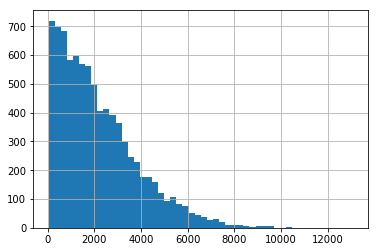

In [36]:
data['Item_Outlet_Sales'].hist(bins=50)

In [38]:
#list of the column names
list(data)

['Item_Fat_Content',
 'Item_Identifier',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

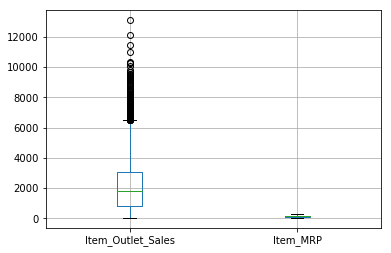

In [52]:
data.boxplot(column=['Item_Outlet_Sales', 'Item_MRP'])